## Setting up VM and Installing required packages

In [10]:
!python3 -m venv myenv

### Activate for linux / MacOS

In [11]:
# Activate the virtual environment (Linux & macOS)
!source myenv/bin/activate


## For Windows

!myvenv\Scripts\activate

In [8]:
pip freeze

absl-py==1.4.0
accelerate==0.23.0
addict==2.4.0
adjustText==0.8
aiofiles==23.2.1
aiohttp==3.8.4
aiosignal==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
appnope==0.1.3
asttokens==2.2.1
async-timeout==4.0.2
attrs==23.1.0
backcall==0.2.0
beautifulsoup4==4.12.2
blinker==1.6.2
blis==0.7.10
bokeh==3.2.2
bqplot==0.12.39
branca==0.6.0
cachetools==5.3.0
catalogue==2.0.9
category-encoders==2.6.2
CausalInference==0.1.3
certifi==2022.12.7
cffi @ file:///private/tmp/cffi-20230928-4569-10mse72/cffi-1.16.0
charset-normalizer==3.1.0
click==8.1.3
click-plugins==1.1.1
cligj==0.7.2
comm==0.1.3
community==1.0.0b1
confection==0.1.1
contourpy==1.0.7
cycler==0.11.0
cymem==2.0.7
dataclasses-json==0.5.7
datasets==2.14.1
debugpy==1.6.7
decorator==5.1.1
diffusers==0.18.2
dill==0.3.7
docker-pycreds==0.4.0
dynetx==0.3.2
entrypoints==0.4
et-xmlfile==1.1.0
executing==1.2.0
ExifRead==3.0.0
fastapi==0.103.1
fastcore==1.5.29
fastjsonschema==2.16.3
fastprogress==1.0.3
ffmpy==0.3.1
filelock==3.12.0
Fiona==1.9.4.post1


### Install requirements.txt

In [12]:
# Install necessary packages from requirements.txt
!pip install -r requirements.txt


In [3]:
columns_to_use = [
    'AGE' ,'CNSUS_PCTA',
    'CNSUS_PCTH', 'CNSUS_PCTM', 'CNSUS_PCTO',  'CNSUS_PCTW',
     'EDUCATION', 'ETHNIC_INFER', 'ETHNICGRP',
   'NETWORTH',  "COUNTY_ST",
    'PARTY_CODE',  'PRESENCHLD', 
    'RELIGION',  "CENSUS_TRK",
    'TOD_PRES_D_2016',  'TOD_PRES_D_2020_PREC', 
    'TOD_PRES_R_2016', 'TOD_PRES_R_2016_PREC',
    'TOD_PRES_R_2020_PREC',
    'Q1_Candidate', 
    'TOD_PRES_DIFF_2016_party','TOD_PRES_DIFF_2016_decimal','TOD_PRES_DIFF_2016_PREC_decimal',"TOD_PRES_DIFF_2016_PREC_party",
  'TOD_PRES_DIFF_2020_PREC_party','TOD_PRES_DIFF_2020_PREC_decimal', 'AI_COUNTY_NAME',
         "CREDRATE","HH_SIZE",
    "PRFL_BORDER_SECURITY", "PRFL_CHOICELIFE", "PRFL_CONSERVATIVE_NEWS", "PRFL_TRUMP_SUPPORT",
 "PRFL_IMMIGRATION_REFORM", "VTR_GEN20" ,"VTR_GEN21","VTR_GEN22",
 "VTR_OTH09", "VTR_OTH17", "VTR_PPP04", "VTR_PPP08", "VTR_PPP12", "VTR_PPP16", "VTR_PPP20","PARTY_MIX",
 "PRFL_MARRIAGE_EQUALITY", "ADD_TYPE", "PRFL_HEALTHCARE_REFORM","PRFL_BLM_SUPPORT",
  "PRFL_LIBERAL_NEWS", "PRFL_LGBT_SUPPORT",'PRFL_POLITICAL_IDEOLOGY',"PRFL_ACTIVE_MIL",'STATE',"COUNTY_TYPE"]

In [8]:
from preprocessing_utils import *
from candidatemodeler import *
import pandas as pd
import numpy as np

seed = 42
np.random.seed(seed)

survey_data_path = "/Volumes/DeepLearner/MADS/Milestone_data/surveydata.csv"
data_5k_path = "/Volumes/DeepLearner/MADS/Milestone_data/data_500k.csv"
config_path = "/Volumes/DeepLearner/MADS/Milestone2_Party_prediction/milestone2_MADS/preprocessing_config.json"

In [9]:
surveydata = pd.read_csv(survey_data_path, low_memory=False)
data_5k = pd.read_csv(data_5k_path, low_memory=False)
data_5k_sample = data_5k.sample(n=5000, random_state=seed)

In [10]:
preprocessor_survey = DataPreprocessor(surveydata, is_training=True,config_path=config_path)
survey_df = preprocessor_survey.run_preprocessing_pipeline(skip_preprocess_dataframe=True, use_frequency_encoding=True, drop_converted_cols=True)

preprocessor_5k = DataPreprocessor(data_5k_sample,is_training=False, config_path=config_path)
data_5k_df = preprocessor_5k.run_preprocessing_pipeline(skip_preprocess_dataframe=True, use_frequency_encoding=True, drop_converted_cols=True)

Loading config from /Volumes/DeepLearner/MADS/Milestone2_Party_prediction/milestone2_MADS/preprocessing_config.json
DataPreprocessor initialized.
Bleep bloop...
Applying config...
Standardizing missing values...
Imputing missing values...
Hang in there, still sweeping the floor...
Imputing missing values...
Hang in there, still sweeping the floor...
Imputing missing values...
Hang in there, still sweeping the floor...
Mapping categorical values...
Oh smokes, forgot to make the bed...
Engineering new features...
Preprocessing turnout columns...
Voila! cleaning chores have finished, time to explore!


In [11]:
columns_to_use.append("PARTY_INFER")

survey_df['PARTY_INFER'] = survey_df.apply(set_inferred_party, axis=1)
data_5k_df['PARTY_INFER'] = data_5k_df.apply(set_inferred_party, axis=1)

In [12]:
survey_df, columns_to_use = feature_engineering_voting_data(survey_df, columns_to_use, extend_columns=True)
data_5k_df, columns_to_use = feature_engineering_voting_data(data_5k_df, columns_to_use, extend_columns=False)

In [7]:
survey_df = survey_df[columns_to_use]

Starting data preparation...
['OTHER GOP' 'PRESIDENT DONALD TRUMP' 'PRESIDENT JOE BIDEN']
Starting model training...


  0%|          | 0/5 [00:00<?, ?it/s]

Cross-validation scores for RF: [0.41666667 0.4212963  0.40740741 0.40277778 0.4372093 ]
Mean CV score for RF: 0.4170714900947459


 20%|██        | 1/5 [00:10<00:43, 10.90s/it]

Cross-validation scores for XGBoost: [0.37037037 0.36574074 0.36111111 0.36111111 0.37209302]
Mean CV score for XGBoost: 0.3660852713178295


 40%|████      | 2/5 [00:21<00:32, 10.84s/it]

Cross-validation scores for LogisticRegression: [0.53240741 0.55092593 0.53240741 0.53240741 0.54883721]
Mean CV score for LogisticRegression: 0.5393970714900947


 60%|██████    | 3/5 [00:38<00:26, 13.36s/it]

Cross-validation scores for SVM: [0.57407407 0.59722222 0.55092593 0.55555556 0.55813953]
Mean CV score for SVM: 0.5671834625322998


 80%|████████  | 4/5 [00:48<00:12, 12.22s/it]

Cross-validation scores for GBC: [0.37037037 0.36574074 0.36574074 0.36111111 0.37209302]
Mean CV score for GBC: 0.3670111972437554


100%|██████████| 5/5 [01:13<00:00, 14.71s/it]


Plotting feature importance for RF


Plotting feature importance for XGBoost


Plotting feature importance for LogisticRegression


Plotting feature importance for SVM
For non-linear kernels in SVM, feature importance is not straightforward to compute.
Plotting feature importance for GBC


Evaluating RF...
Classification Report for RF on Training Data:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 295}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 395}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 389}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1079}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1079}}
Classification Report for RF on Test Data:
{'0': {'precision': 0.23809523809523808, 'recall': 0.07246376811594203, 'f1-score': 0.11111111111111112, 'support': 69}, '1': {'precision': 0.3901345291479821, 'recall': 0.8877551020408163, 'f1-score': 0.5420560747663551, 'support': 98}, '2': {'precision': 0.7307692307692307, 'recall': 0.18446601941747573, 'f1-score': 0.29457364341085274, 'support': 103}, 'accuracy': 0.4111111111111111, 'macro avg': {'precision': 0.45299966600415037, 'recall': 0.381561629858078, 'f1-score': 0.31591360

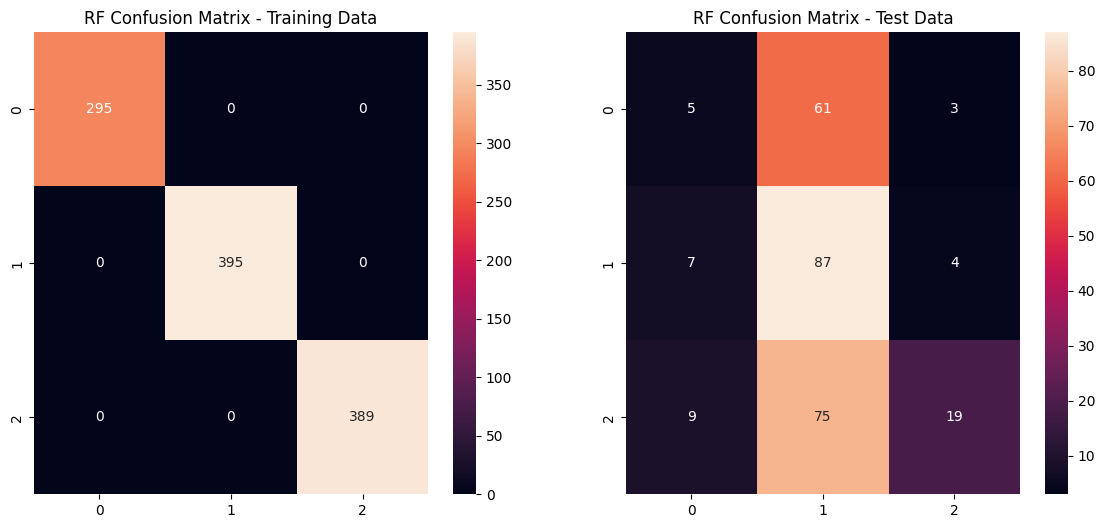

Evaluating XGBoost...
Classification Report for XGBoost on Training Data:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 295}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 395}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 389}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1079}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1079}}
Classification Report for XGBoost on Test Data:
{'0': {'precision': 1.0, 'recall': 0.014492753623188406, 'f1-score': 0.02857142857142857, 'support': 69}, '1': {'precision': 0.3643122676579926, 'recall': 1.0, 'f1-score': 0.5340599455040872, 'support': 98}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 103}, 'accuracy': 0.36666666666666664, 'macro avg': {'precision': 0.4547707558859975, 'recall': 0.33816425120772947, 'f1-score': 0.18754379135850527, 'support': 270}, 'weighted avg': {'precision': 0.

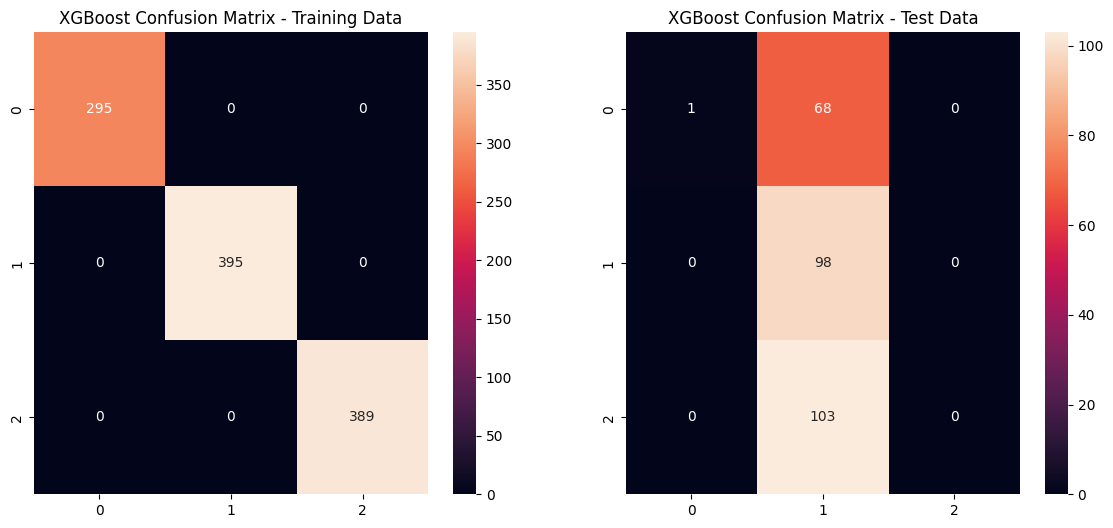

Evaluating LogisticRegression...
Classification Report for LogisticRegression on Training Data:
{'0': {'precision': 0.9932432432432432, 'recall': 0.9966101694915255, 'f1-score': 0.9949238578680203, 'support': 295}, '1': {'precision': 0.9871134020618557, 'recall': 0.9696202531645569, 'f1-score': 0.9782886334610473, 'support': 395}, '2': {'precision': 0.9746835443037974, 'recall': 0.9897172236503856, 'f1-score': 0.9821428571428571, 'support': 389}, 'accuracy': 0.9842446709916589, 'macro avg': {'precision': 0.9850133965362988, 'recall': 0.985315882102156, 'f1-score': 0.9851184494906415, 'support': 1079}, 'weighted avg': {'precision': 0.9843081087167442, 'recall': 0.9842446709916589, 'f1-score': 0.9842262462620491, 'support': 1079}}
Classification Report for LogisticRegression on Test Data:
{'0': {'precision': 1.0, 'recall': 0.014492753623188406, 'f1-score': 0.02857142857142857, 'support': 69}, '1': {'precision': 0.49206349206349204, 'recall': 0.9489795918367347, 'f1-score': 0.648083623693

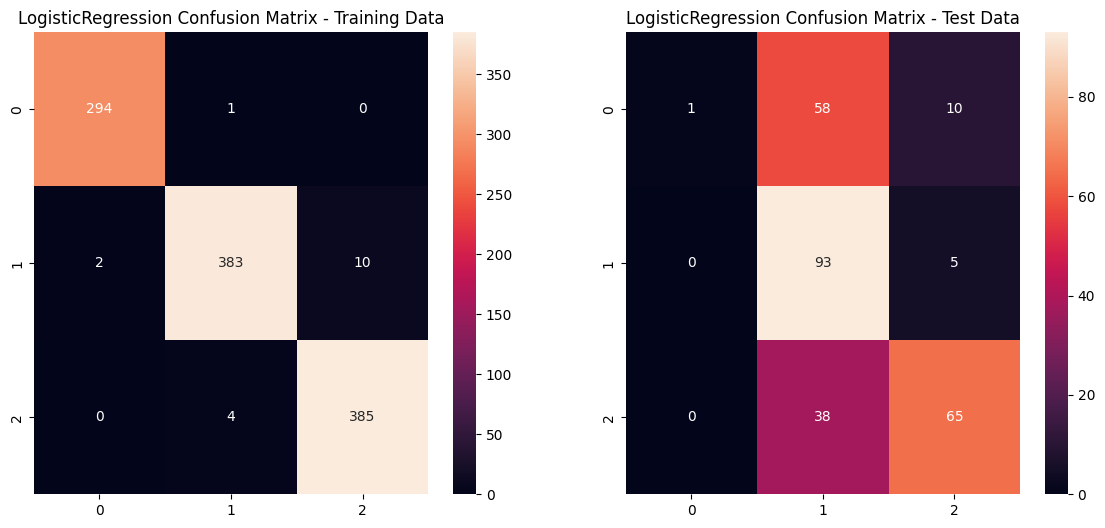

Evaluating SVM...
Classification Report for SVM on Training Data:
{'0': {'precision': 0.8404255319148937, 'recall': 0.2677966101694915, 'f1-score': 0.40616966580976865, 'support': 295}, '1': {'precision': 0.5785953177257525, 'recall': 0.8759493670886076, 'f1-score': 0.6968781470292044, 'support': 395}, '2': {'precision': 0.7777777777777778, 'recall': 0.7737789203084833, 'f1-score': 0.7757731958762888, 'support': 389}, 'accuracy': 0.6728452270620945, 'macro avg': {'precision': 0.7322662091394746, 'recall': 0.6391749658555275, 'f1-score': 0.626273669571754, 'support': 1079}, 'weighted avg': {'precision': 0.7219890991400569, 'recall': 0.6728452270620945, 'f1-score': 0.6458412351124132, 'support': 1079}}
Classification Report for SVM on Test Data:
{'0': {'precision': 0.42857142857142855, 'recall': 0.08695652173913043, 'f1-score': 0.14457831325301204, 'support': 69}, '1': {'precision': 0.5163398692810458, 'recall': 0.8061224489795918, 'f1-score': 0.6294820717131474, 'support': 98}, '2': {'p

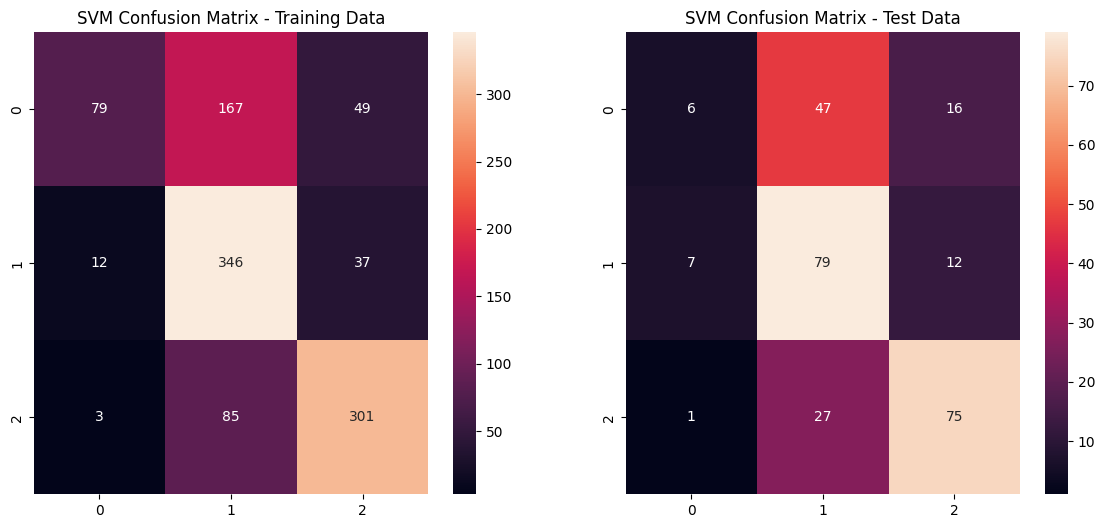

Evaluating GBC...
Classification Report for GBC on Training Data:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 295}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 395}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 389}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1079}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1079}}
Classification Report for GBC on Test Data:
{'0': {'precision': 1.0, 'recall': 0.014492753623188406, 'f1-score': 0.02857142857142857, 'support': 69}, '1': {'precision': 0.3643122676579926, 'recall': 1.0, 'f1-score': 0.5340599455040872, 'support': 98}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 103}, 'accuracy': 0.36666666666666664, 'macro avg': {'precision': 0.4547707558859975, 'recall': 0.33816425120772947, 'f1-score': 0.18754379135850527, 'support': 270}, 'weighted avg': {'precision': 0.387787415668

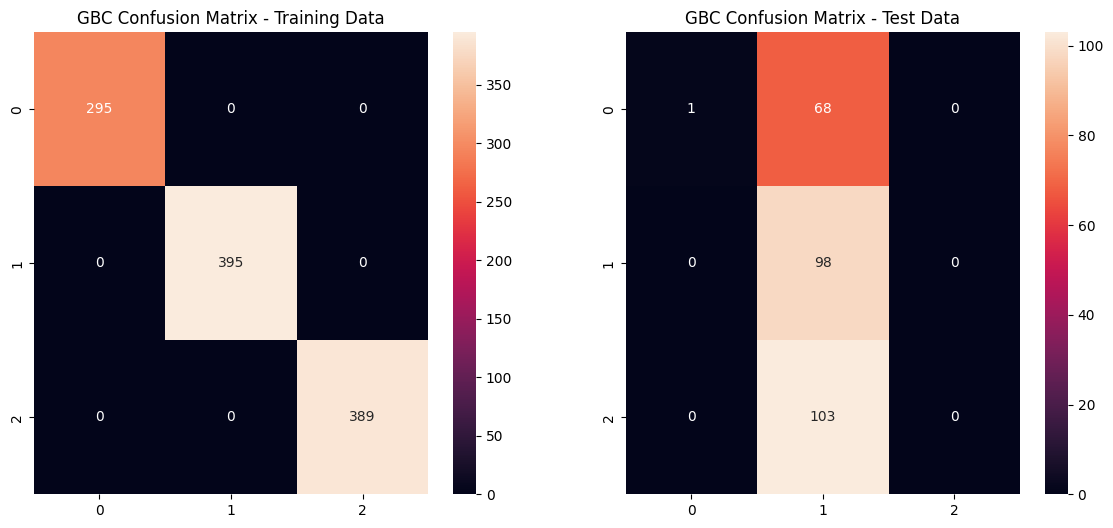

Next exp_id generated: experiment_420


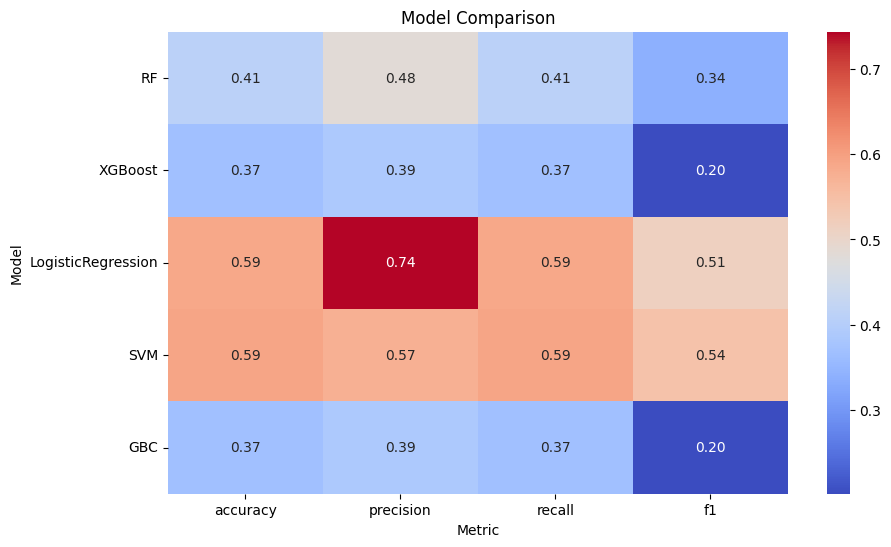

In [13]:
# drop party code from data_5k_df
#survey_df= survey_df.drop(columns=['PARTY_CODE'])

pipeline = ModelTrainingPipeline(survey_df, target_col='Q1_Candidate')

# 2. Prepare the data
pipeline.prepare_data(encoding_type='target')  # or 'label', or 'target' depending on your needs
pipeline.create_preprocessing_pipeline(scale_data=True, feature_engineering=None)
models_to_use = ['RF', 'XGBoost', 'LogisticRegression', 'SVM', 'GBC']

# 4. Train all models
pipeline.train_models(model_type=['RF', 'XGBoost', 'LogisticRegression', 'SVM', 'GBC'], use_grid_search=False, use_cv=True, cv_folds=5, evaluate=True, 
                     plot_learning_curve=False, compare_models=True, feature_importance=True, experiment_logging=True, saved_params_path=None)



In [15]:
new_data = pipeline.prepare_new_data(data_5k_df)

Starting new data preparation...
relevant_columns:  ['AGE', 'CNSUS_PCTA', 'CNSUS_PCTH', 'CNSUS_PCTM', 'CNSUS_PCTO', 'CNSUS_PCTW', 'COUNTY_ST', 'CENSUS_TRK', 'TOD_PRES_D_2016', 'TOD_PRES_D_2020_PREC', 'TOD_PRES_R_2016', 'TOD_PRES_R_2016_PREC', 'TOD_PRES_R_2020_PREC', 'TOD_PRES_DIFF_2016_decimal', 'TOD_PRES_DIFF_2016_PREC_decimal', 'TOD_PRES_DIFF_2020_PREC_decimal', 'HH_SIZE', 'interaction_div_2020', 'interaction_div_2016', 'interaction_mult_delta', 'interaction_div_D_2020', 'interaction_div_D_2016', 'interaction_mult_D_delta', 'Years_Voted_Democrat', 'Years_Voted_Republican', 'Years_Early_Democrat', 'Years_Early_Republican', 'Years_Absentee_Democrat', 'Years_Absentee_Republican', 'Years_Voted_Democrat_Primaries', 'Years_Voted_Republican_Primaries', 'Years_Early_Democrat_Primaries', 'Years_Early_Republican_Primaries', 'count_Early', 'count_Absentee', 'count_R_VTR_GEN', 'count_D_VTR_GEN', 'longest_streak_D_VTR_GEN', 'longest_streak_R_VTR_GEN', 'count_R_VTR_PPP', 'count_D_VTR_PPP', 'longes

In [16]:
new_data

,AGE,CNSUS_PCTA,CNSUS_PCTH,CNSUS_PCTM,CNSUS_PCTO,CNSUS_PCTW,COUNTY_ST,CENSUS_TRK,TOD_PRES_D_2016,TOD_PRES_D_2020_PREC,...,ADD_TYPE,PRFL_HEALTHCARE_REFORM,PRFL_BLM_SUPPORT,PRFL_LIBERAL_NEWS,PRFL_LGBT_SUPPORT,PRFL_POLITICAL_IDEOLOGY,PRFL_ACTIVE_MIL,STATE,COUNTY_TYPE,PARTY_INFER
104241,49.0,0.000000,5.263158,0.000000,0.000000,92.105263,155,31900.0,36.3,33.4,...,S,N,N,N,Unknown,Conservative,N,IA,U,Republican
199676,26.0,15.178571,9.821429,3.571429,1.785714,18.750000,5,440900.0,56.5,75.1,...,S,N,N,Y,Unknown,Moderate,N,MD,U,Democrat
140199,33.0,1.739130,3.478261,0.869565,0.000000,92.173913,97,6904.0,41.8,25.0,...,S,N,N,N,Unknown,Conservative,N,AL,U,Republican
132814,95.0,0.000000,14.285714,7.142857,0.000000,78.571429,111,2000.0,55.3,48.6,...,S,N,N,Y,Likely LGBT Supporter,Liberal,N,CA,U,Democrat
408697,60.0,0.000000,29.203540,2.654867,0.884956,55.752212,439,113803.0,43.4,39.1,...,S,N,N,N,Unknown,Conservative,N,TX,U,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475007,50.0,3.837953,11.300640,0.852878,2.558635,78.891258,79,14400.0,66.4,76.0,...,S,N,N,Y,Unknown,Liberal,N,WI,U,Democrat
216869,58.0,0.000000,2.631579,10.526316,0.000000,84.210526,163,589401.0,66.7,38.5,...,S,N,N,Y,Unknown,Liberal,N,MI,U,Democrat
240989,50.0,0.000000,0.000000,0.000000,0.000000,100.000000,157,470200.0,17.4,14.7,...,S,N,N,N,Unknown,Conservative,N,MO,R,Republican
137678,54.0,0.000000,0.000000,4.545455,0.000000,0.000000,101,2300.0,62.0,94.6,...,S,N,Y,Y,Unknown,Liberal,N,AL,U,Democrat


In [17]:
infer_results = pipeline.make_inference(new_data, return_dataframe=True)

** rubs crystal ball **
Ah, the forest is dense but full of wisdom.
Hmm, so that's interesting. Totally makes sense. XGBoost gets it.
Calculating odds and making bets.
Support vectors to the rescue!
Hmm, so that's interesting. Totally makes sense. GBC gets it.
No trained model found for type GBC. Skipping.


In [20]:
infer_results

,AGE,CNSUS_PCTA,CNSUS_PCTH,CNSUS_PCTM,CNSUS_PCTO,CNSUS_PCTW,COUNTY_ST,CENSUS_TRK,TOD_PRES_D_2016,TOD_PRES_D_2020_PREC,...,PRFL_POLITICAL_IDEOLOGY,PRFL_ACTIVE_MIL,STATE,COUNTY_TYPE,PARTY_INFER,RF_Prediction,XGBoost_Prediction,LogisticRegression_Prediction,SVM_Prediction,GBC_Prediction
104241,49.0,0.000000,5.263158,0.000000,0.000000,92.105263,155,31900.0,36.3,33.4,...,Conservative,N,IA,U,Republican,1,1,1,1,1
199676,26.0,15.178571,9.821429,3.571429,1.785714,18.750000,5,440900.0,56.5,75.1,...,Moderate,N,MD,U,Democrat,2,2,2,2,2
140199,33.0,1.739130,3.478261,0.869565,0.000000,92.173913,97,6904.0,41.8,25.0,...,Conservative,N,AL,U,Republican,1,1,1,1,1
132814,95.0,0.000000,14.285714,7.142857,0.000000,78.571429,111,2000.0,55.3,48.6,...,Liberal,N,CA,U,Democrat,2,2,2,2,2
408697,60.0,0.000000,29.203540,2.654867,0.884956,55.752212,439,113803.0,43.4,39.1,...,Conservative,N,TX,U,Republican,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475007,50.0,3.837953,11.300640,0.852878,2.558635,78.891258,79,14400.0,66.4,76.0,...,Liberal,N,WI,U,Democrat,2,1,2,2,2
216869,58.0,0.000000,2.631579,10.526316,0.000000,84.210526,163,589401.0,66.7,38.5,...,Liberal,N,MI,U,Democrat,2,1,2,2,2
240989,50.0,0.000000,0.000000,0.000000,0.000000,100.000000,157,470200.0,17.4,14.7,...,Conservative,N,MO,R,Republican,1,1,1,1,1
137678,54.0,0.000000,0.000000,4.545455,0.000000,0.000000,101,2300.0,62.0,94.6,...,Liberal,N,AL,U,Democrat,2,2,2,2,2


In [21]:
pipeline.plot_majority_predictions(infer_results, state_col="STATE",pred_col="SVM_Prediction")

Labels are already decoded. Skipping label decoding.


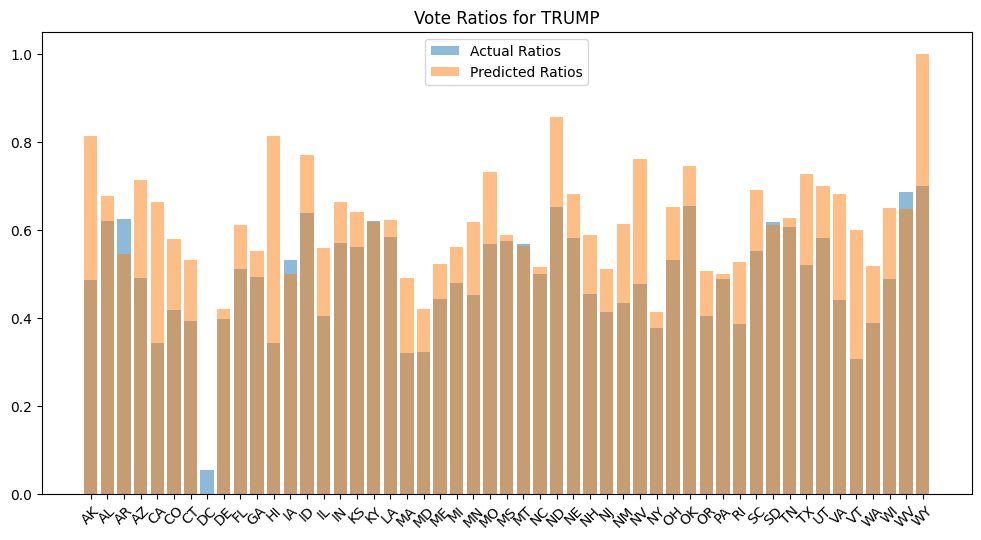

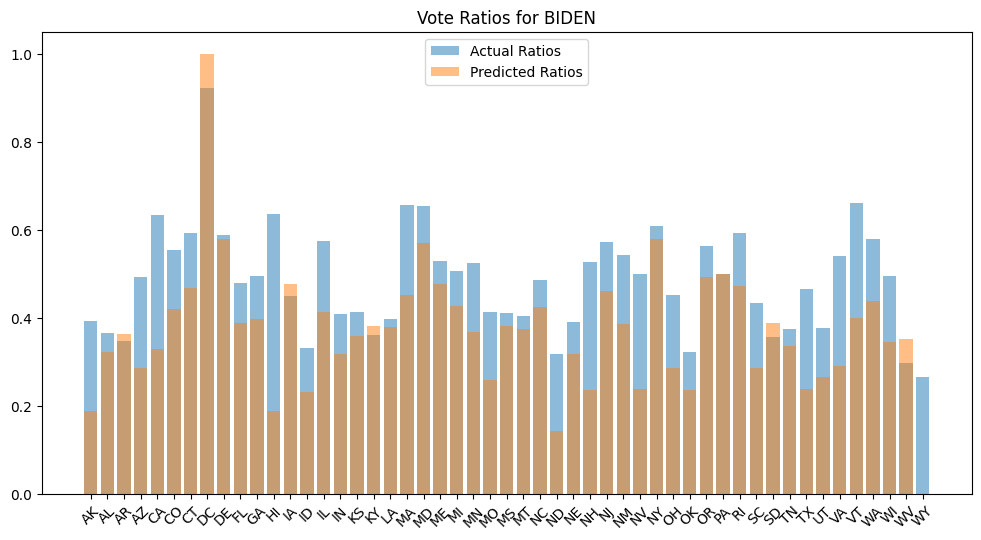

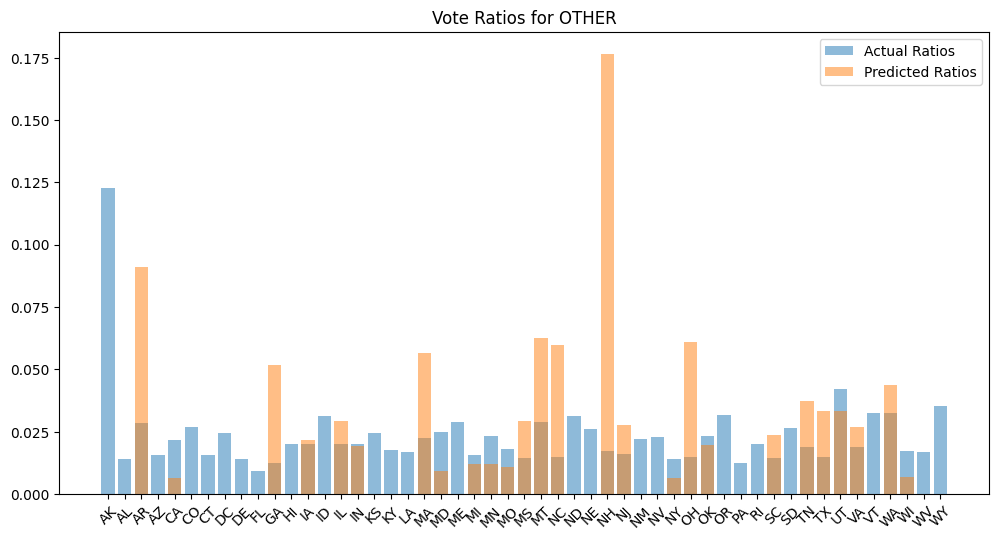

In [22]:
actual_votes_path = "/Volumes/DeepLearner/MADS/Milestone_data/VOTES_BY_STATE_2020_PRES.csv"

pipeline.compare_with_actual_votes(actual_votes_path, infer_results, state_col='STATE', pred_col='SVM_Prediction')

## Sensitivity Analysis

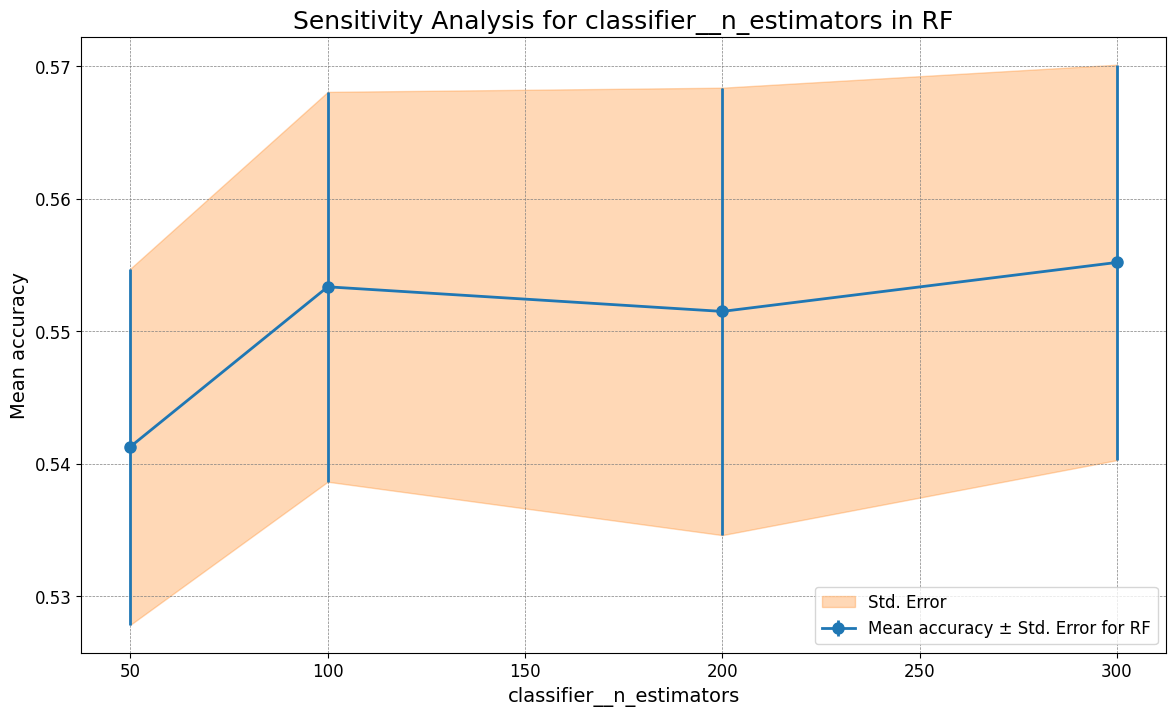

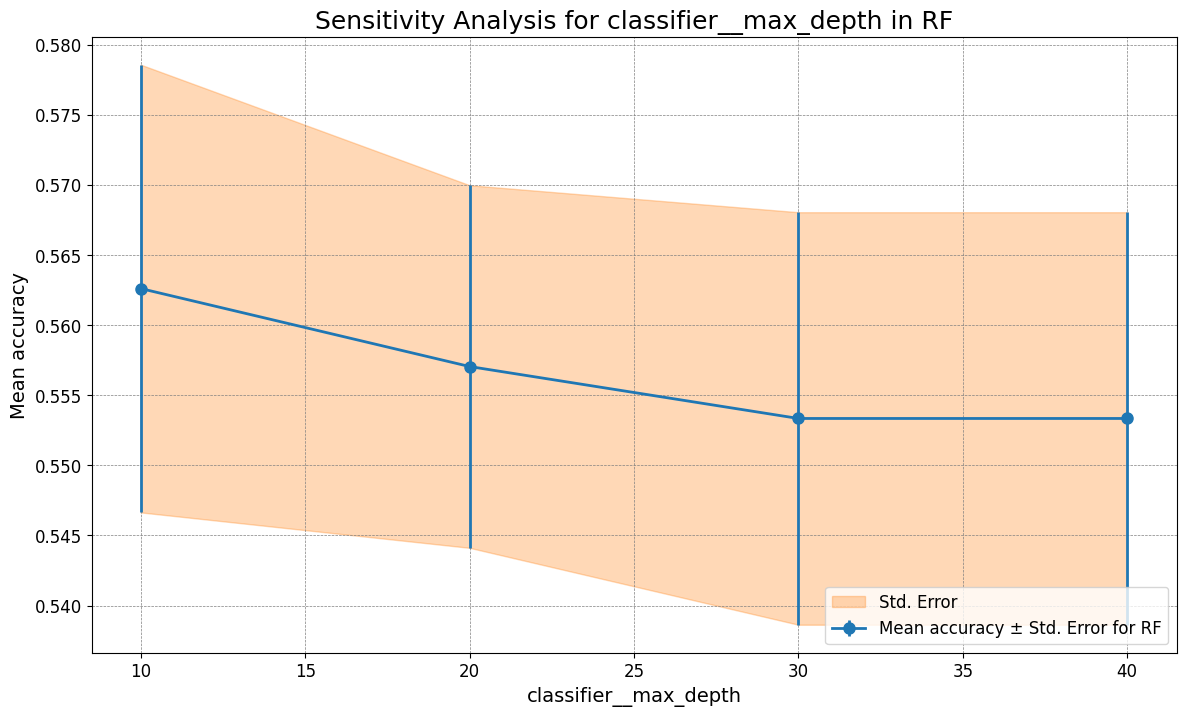

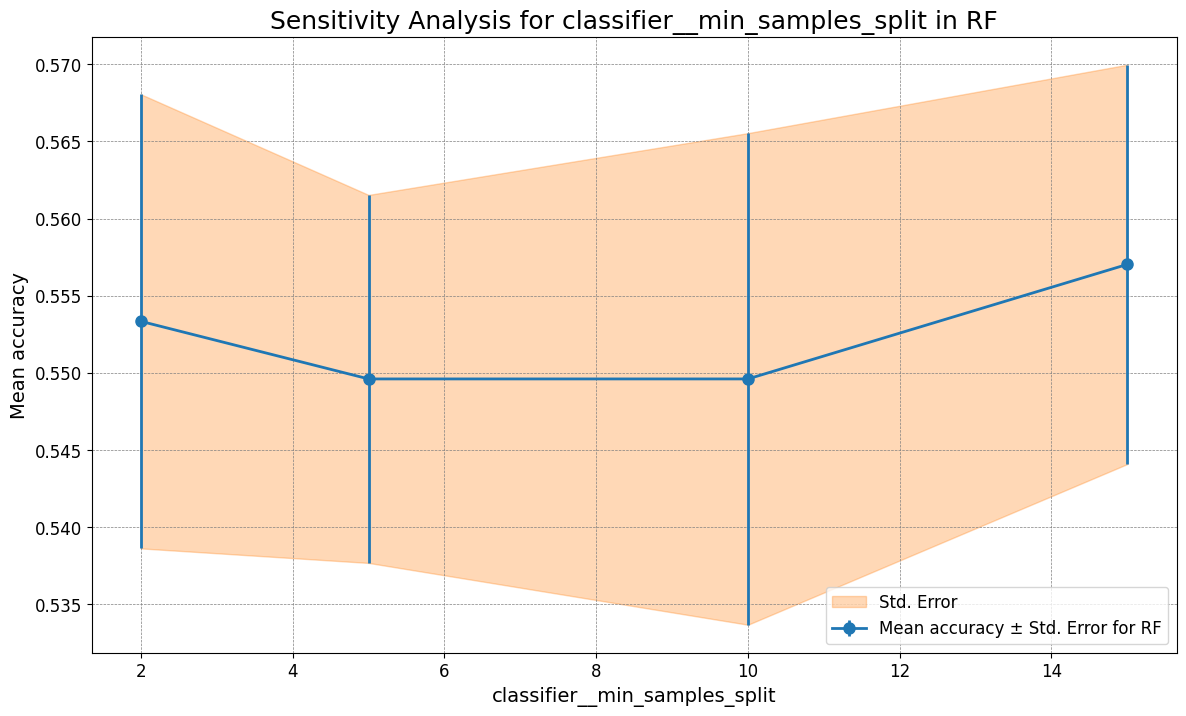

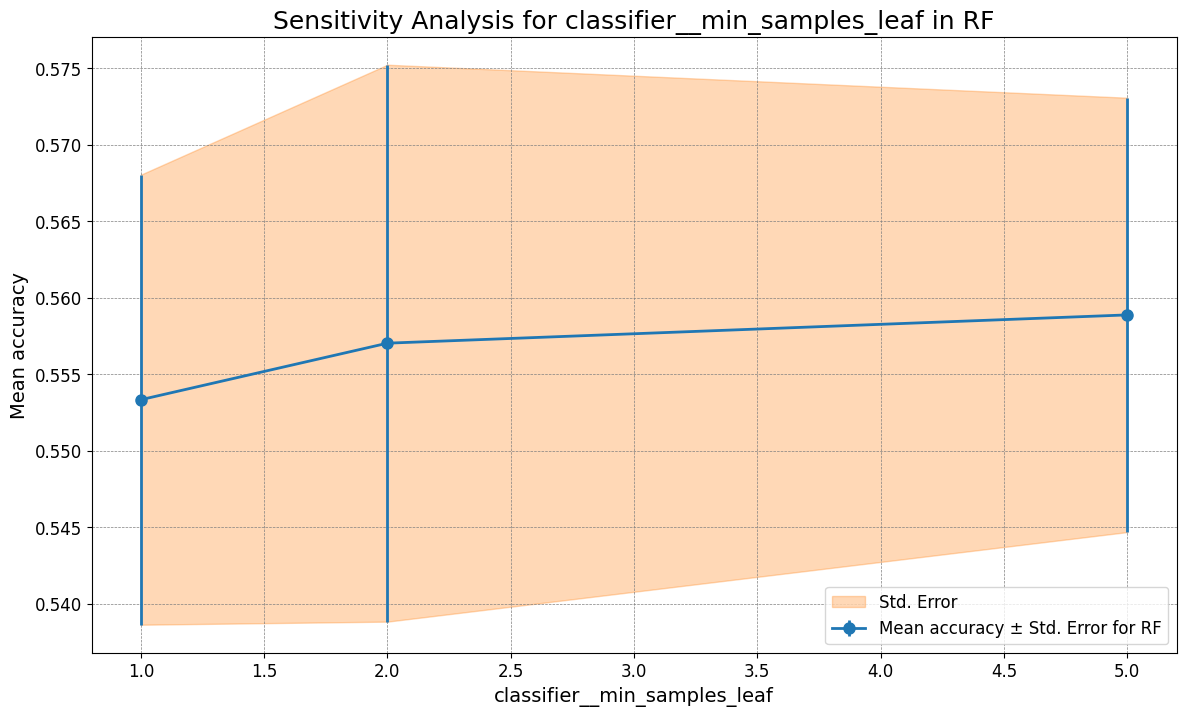

Skipping preprocessor__num__kmeans__n_clusters=4 due to error: Invalid parameter 'kmeans' for estimator Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())]). Valid parameters are: ['memory', 'steps', 'verbose'].
Skipping preprocessor__num__kmeans__n_clusters=8 due to error: Invalid parameter 'kmeans' for estimator Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())]). Valid parameters are: ['memory', 'steps', 'verbose'].
Skipping preprocessor__num__kmeans__n_clusters=12 due to error: Invalid parameter 'kmeans' for estimator Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())]). Valid parameters are: ['memory', 'steps', 'verbose'].


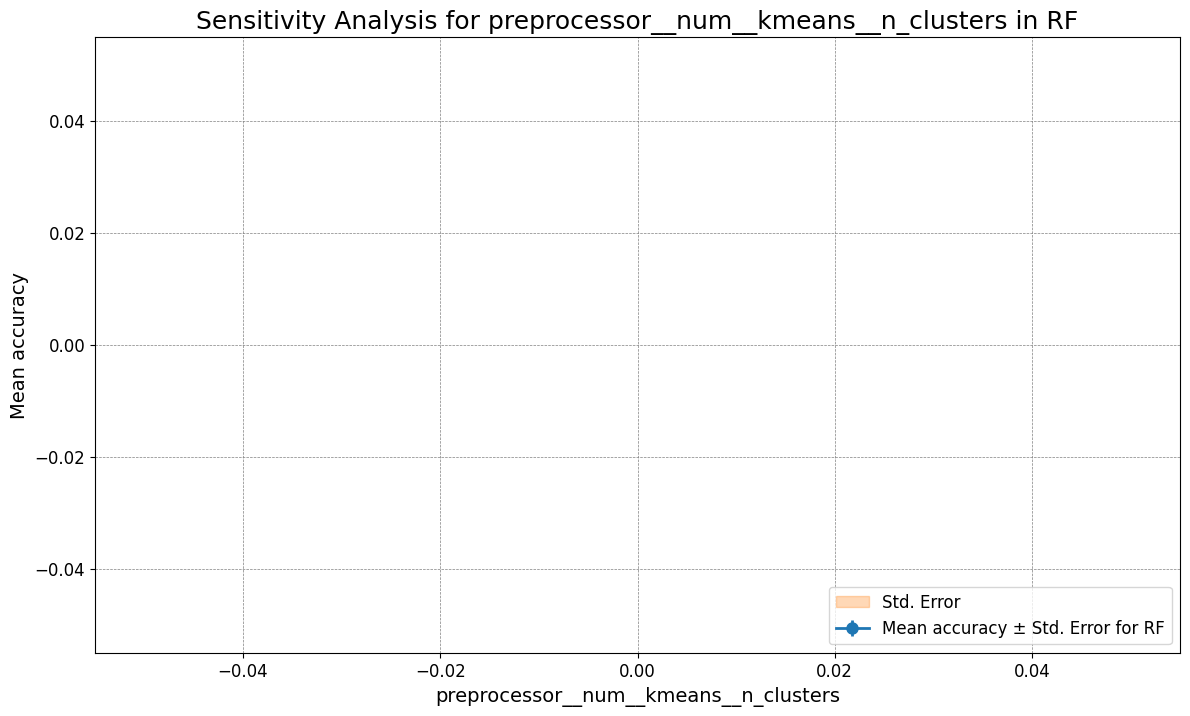

Skipping preprocessor__num__pca__n_components=4 due to error: Invalid parameter 'pca' for estimator Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())]). Valid parameters are: ['memory', 'steps', 'verbose'].
Skipping preprocessor__num__pca__n_components=7 due to error: Invalid parameter 'pca' for estimator Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())]). Valid parameters are: ['memory', 'steps', 'verbose'].
Skipping preprocessor__num__pca__n_components=10 due to error: Invalid parameter 'pca' for estimator Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())]). Valid parameters are: ['memory', 'steps', 'verbose'].


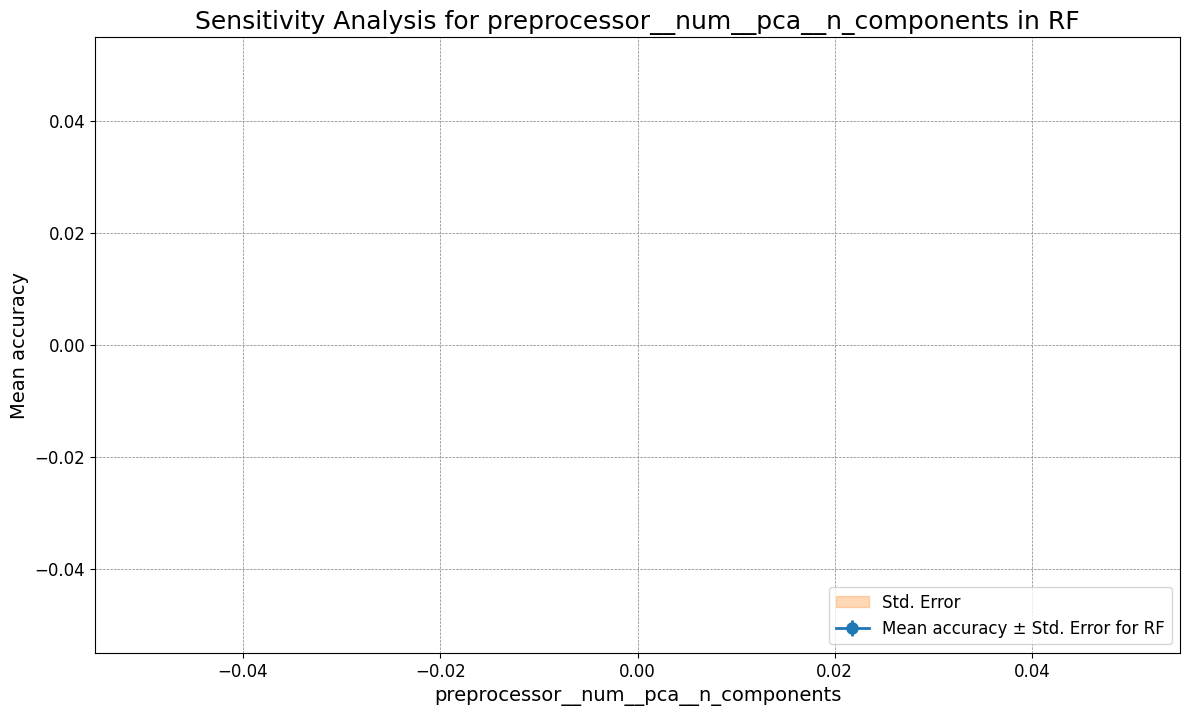

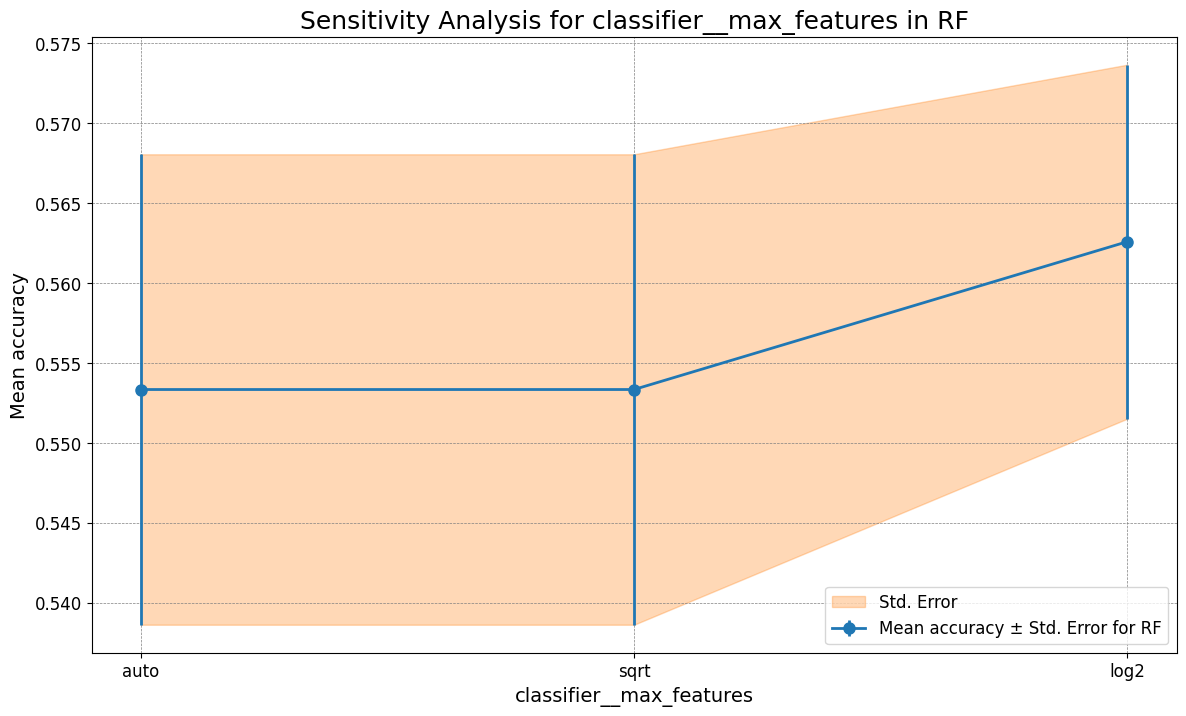

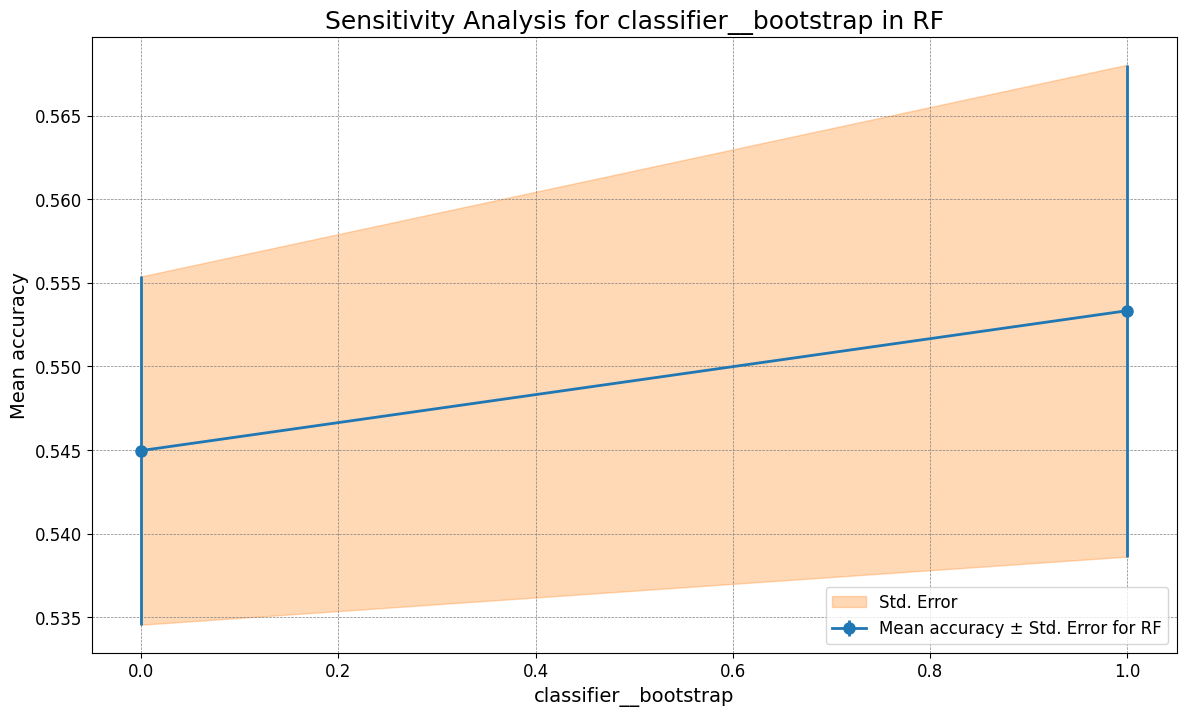

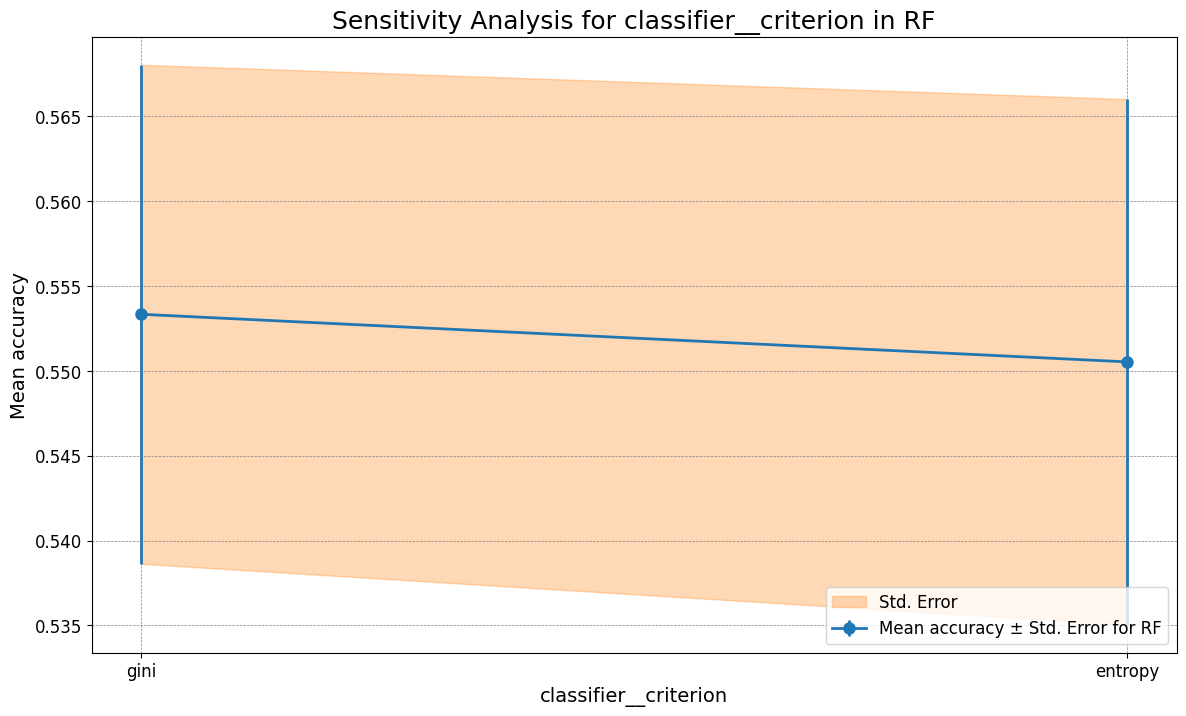

In [23]:
hyperparameters_path = "/Volumes/DeepLearner/candidate_modeler/candidate_modeler_MADS/hyperparameters.json"
pipeline.load_hyperparameters(hyperparameters_path)
pipeline.perform_sensitivity_analysis(model_type='RF')

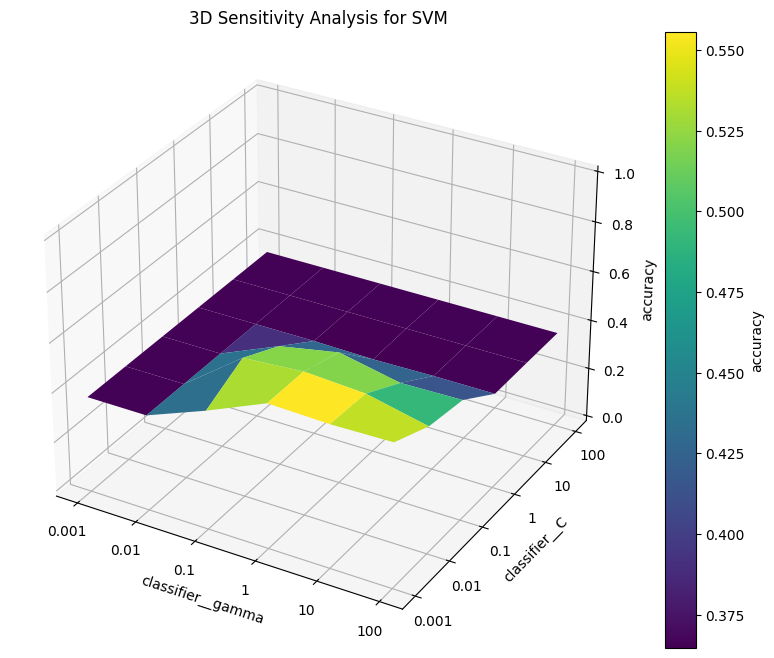

In [24]:
pipeline.plot_3D_sensitivity(model_type='SVM', param1='classifier__gamma', param2='classifier__C', metric='accuracy', log_scale=True)

# Deactivate VM

In [9]:
# Deactivate the virtual environment
!deactivate